LMC / SMC field plots using HYDRA spectroscopic results and Gaia DR2 information

In [1]:
import astropy
from astropy.io import fits
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Open FITS file and define necessary parameters

In [2]:
hydra_gaia = fits.open(r"/Users/devinmcdonald/Desktop/LMC-SMC/hydra_gaiadr2.fits")
hydra_gaia_info = hydra_gaia[1].data

In [3]:
params = ['M0', 'MT0', 'VHELIO', 'FIELD', 
          'TEFF', 'LOGG', 'PMML', 'PMMB']

var = {f: hydra_gaia_info[f] for f in params}

M0 = var['M0']
MT0 = var['MT0']
vhelio = var['VHELIO']
field = var['FIELD']
teff = var['TEFF']
logg = var['LOGG']
pmml = var['PMML']
pmmb = var['PMMB']

Create a function to display all possible field options (not necessary); I will be working with field 100L335a

In [4]:
def unique(_list_): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in _list_: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    return np.array(unique_list)

unique(field)

array(['NEa1', 'NEb4', 'NEb1', 'NEb2', 'NEc1', 'NEc3', 'NEc5', 'NEd1',
       'NEd2', 'NEd6', 'NEe1', 'NEe2', 'NEe5', 'N1', 'N2', 'N3', 'N4',
       'N5', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'NE1', 'NE2',
       'NE3', 'NE4', 'NE5', 'NE6', '270', '275', '280', '285', '290',
       '295', '300', '305', '310', '315', 'NEa2', '70L096a', '70L268a',
       '100L335a', '130L119a', '160L282b', '160L307b', '160L358b',
       '190L016a', '190L290b', '190L311b', '190L333a', '190L354a', 'F3',
       'F1', 'F2', 'S3', 'S4'], dtype='<U8')

Define a preliminary cut based on the field of choice, teff, logg, and vhelio

In [5]:
prelim_cut = ((teff < 800000) &
                
            (logg < 800000) &
          
            (vhelio > -200) &
            
            (vhelio < 400) &
            
            (field == '100L335a'))

pMT0 = MT0[prelim_cut]
pM0 = M0[prelim_cut]
pteff = teff[prelim_cut]
plogg = logg[prelim_cut]
ppmml = pmml[prelim_cut]
ppmmb = pmmb[prelim_cut]
pvhelio = vhelio[prelim_cut]
pfield = field[prelim_cut]

Define a cut based on proper motion and differentiate between those stars within the cut and those outside


-pm in milli l and milli b

-cut within 2" of 1.8 pmml and 0.4 pmmb

In [6]:
pm_cut = (((ppmml-1.8)**2 + (ppmmb-0.4)**2 <= 4) &
          
          (pfield == '100L335a'))

pmml_cut = ppmml[pm_cut]
pmmb_cut = ppmmb[pm_cut]

pmml_outside = []
for i in range(len(ppmml)):
    if ppmml[i] not in pmml_cut:
        pmml_outside.append(ppmml[i])
pmmb_outside = []
for i in range(len(ppmml)):
    if ppmmb[i] not in pmmb_cut:
        pmmb_outside.append(ppmmb[i])

In [7]:
vhelio_cut = pvhelio[pm_cut]

vhelio_outside = []
for i in range(len(pvhelio)):
    if pvhelio[i] not in vhelio_cut:
        vhelio_outside.append(pvhelio[i])

Plot stars (that passed the preliminary cut) within field 100L335a centered on the stars of interest

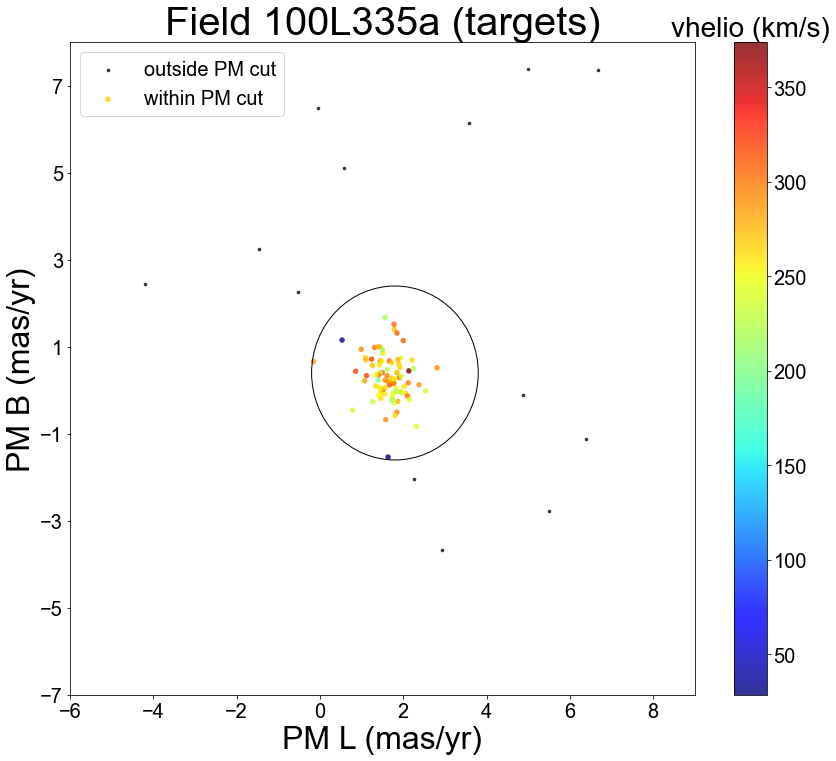

In [8]:
fig, ax = plt.subplots()

norm_pm = mpl.colors.Normalize(vmin=np.min(pvhelio),vmax=np.max(pvhelio))

outside = plt.scatter(pmml_outside, pmmb_outside, s = 50, alpha = 0.8, marker = '.', color = 'black', lw = 0)
inside = plt.scatter(pmml_cut, pmmb_cut, s = 30, alpha = 0.8, marker = 'o', cmap = 'jet', c=vhelio_cut, lw = 0)

circ = plt.Circle((1.8, 0.4), 2, fill = None, color = 'black', alpha = 1)
plt.xlabel('PM L (mas/yr)', fontsize = 32)
plt.ylabel('PM B (mas/yr)', fontsize = 32)

plt.legend(['outside PM cut', 'within PM cut'], fontsize = 20)
ax.add_artist(circ)

clb_x = plt.colorbar(inside)
clb_x.ax.tick_params(labelsize=20) 
clb_x.ax.set_title('vhelio (km/s)', fontsize = 28)

plt.xlim(-1-5,4+5)
plt.ylim(-2-5,3+5)
plt.xticks(np.arange(min(plt.xlim()),max(plt.xlim()) +1, 2), fontsize = 20)
plt.yticks(np.arange(min(plt.ylim()),max(plt.ylim()) +1, 2), fontsize = 20)

plt.title('Field 100L335a (targets)', fontsize = 40)
sns.set_style("ticks")
plt.plot(3,0)

fig.set_size_inches(14, 12)

Apply proper motion cut to relevant parameters--in this case MT0 and M0

In [9]:
MT0_cut = pMT0[pm_cut]
M0_cut = pM0[pm_cut]
vhelio_cut = pvhelio[pm_cut]

MT0_outside = []
for i in range(len(pvhelio)):
    if pMT0[i] not in MT0_cut:
        MT0_outside.append(pMT0[i])
M0_outside = []
for i in range(len(pvhelio)):
    if pM0[i] not in M0_cut:
        M0_outside.append(pM0[i])
vhelio_outside = []
for i in range(len(pvhelio)):
    if pvhelio[i] not in vhelio_cut:
        vhelio_outside.append(pvhelio[i])

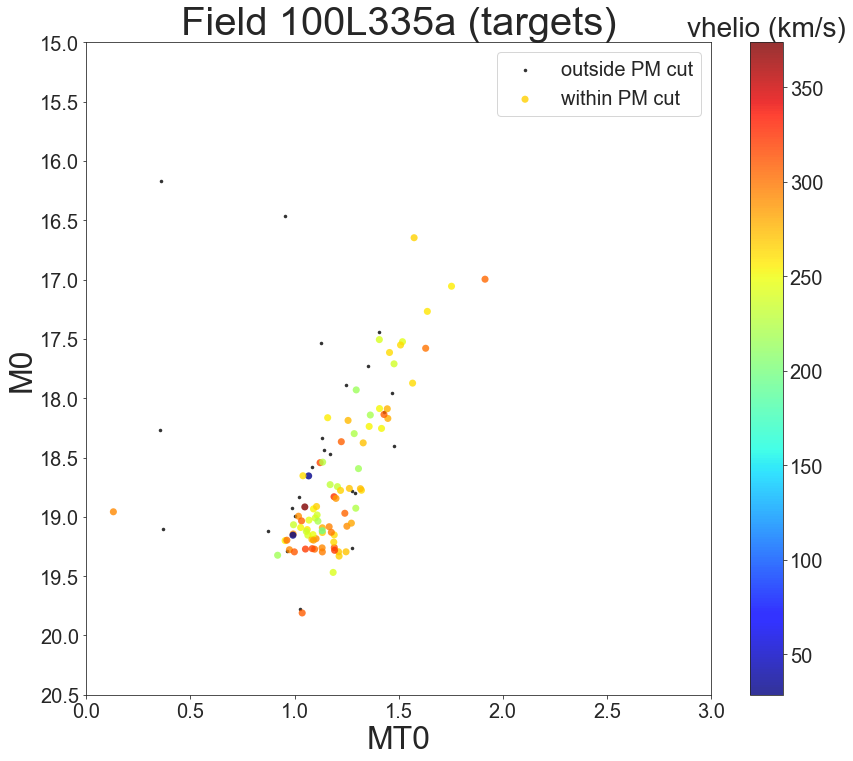

In [10]:
fig, ax = plt.subplots()

norm_pm = mpl.colors.Normalize(vmin=np.min(pvhelio),vmax=np.max(pvhelio))

outside = plt.scatter(MT0_outside, M0_outside, s = 50, alpha = 0.8, marker = '.', color = 'black', lw = 0)
inside = plt.scatter(MT0_cut, M0_cut, s = 50, alpha = 0.8, marker = 'o', cmap = 'jet', c=vhelio_cut, lw = 0)

plt.xlabel('MT0', fontsize = 32)
plt.ylabel('M0', fontsize = 32)

plt.legend(['outside PM cut', 'within PM cut'], fontsize = 20)

clb_x = plt.colorbar(inside)
clb_x.ax.tick_params(labelsize=20) 
clb_x.ax.set_title('vhelio (km/s)', fontsize = 28)

plt.xlim(0,2.5)
plt.ylim(20,15)
plt.xticks(np.arange(min(plt.xlim()),max(plt.xlim()) +1, 0.5), fontsize = 20)
plt.yticks(np.arange(min(plt.ylim()),max(plt.ylim()) +1, 0.5), fontsize = 20)

plt.title('Field 100L335a (targets)', fontsize = 40)
sns.set_style("ticks")

fig.set_size_inches(14, 12)

Apply proper motion cut to relevant parameters--in this case logg and teff

In [11]:
teff_cut = pteff[pm_cut]
logg_cut = plogg[pm_cut]
vhelio_cut = pvhelio[pm_cut]

teff_outside = []
for i in range(len(pvhelio)):
    if pteff[i] not in teff_cut:
        teff_outside.append(pteff[i])
logg_outside = []
for i in range(len(pvhelio)):
    if plogg[i] not in logg_cut:
        logg_outside.append(plogg[i])
vhelio_outside = []
for i in range(len(pvhelio)):
    if pvhelio[i] not in vhelio_cut:
        vhelio_outside.append(pvhelio[i])

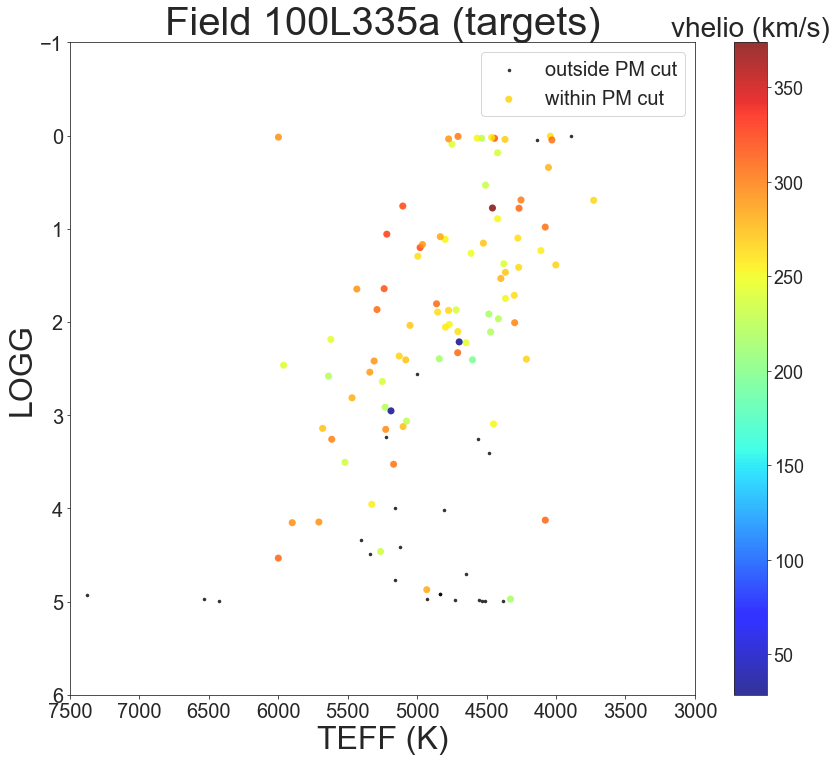

In [12]:
fig, ax = plt.subplots()

norm_pm = mpl.colors.Normalize(vmin=np.min(pvhelio),vmax=np.max(pvhelio))

outside = plt.scatter(teff_outside, logg_outside, s = 50, alpha = 0.8, marker = '.', color = 'black', lw = 0)
inside = plt.scatter(teff_cut, logg_cut, s = 50, alpha = 0.8, marker = 'o', cmap = 'jet', c=vhelio_cut, lw = 0)

plt.xlabel('TEFF (K)', fontsize = 32)
plt.ylabel('LOGG', fontsize = 32)

plt.legend(['outside PM cut', 'within PM cut'], fontsize = 20)

clb_x = plt.colorbar(inside)
clb_x.ax.tick_params(labelsize=18) 
clb_x.ax.set_title('vhelio (km/s)', fontsize = 28)

plt.xlim(7500,3000)
plt.ylim(6,-1)
plt.xticks(np.arange(min(plt.xlim()),max(plt.xlim()) +1, 500), fontsize = 20)
plt.yticks(np.arange(min(plt.ylim()),max(plt.ylim()) +1, 1), fontsize = 20)

plt.title('Field 100L335a (targets)', fontsize = 40)
sns.set_style("ticks")

fig.set_size_inches(14, 12)

vhelio histogram showing all stars in a field and a separate outline for the stars that pass the proper motion cut

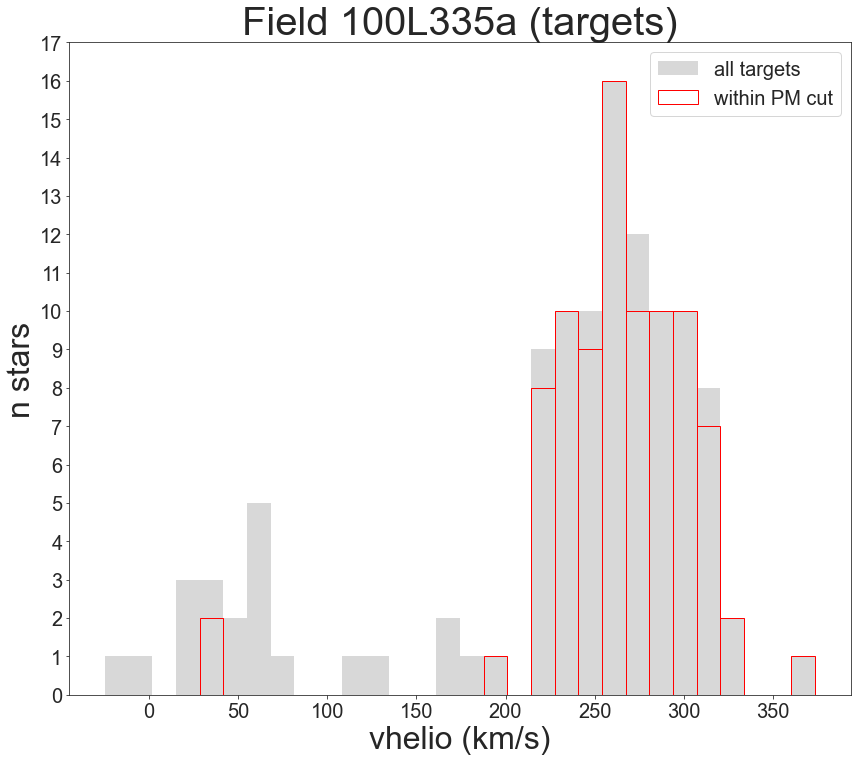

In [13]:
fig, ax = plt.subplots()

bins1=np.histogram(np.hstack((pvhelio, vhelio_cut)), bins=30)[1]
bins2=np.histogram(np.hstack((vhelio_cut)), bins=30)[1]
    

alltargets = plt.hist([pvhelio], stacked=False, color=['grey'], 
                      edgecolor='none', alpha=0.3, label='all targets', bins = bins1)

cut = plt.hist([vhelio_cut], stacked=False, fill=False, 
                      edgecolor='red', alpha=1, label='all targets', bins = bins1)

plt.legend(['all targets', 'within PM cut'], fontsize = 20)

plt.title('Field 100L335a (targets)', fontsize = 40)
plt.xlabel('vhelio (km/s)', fontsize = 32)
plt.ylabel('n stars', fontsize = 32)

plt.xticks(fontsize = 20)
plt.yticks(np.arange(min(plt.ylim()),max(plt.ylim()) +1, 1), fontsize = 20)

sns.set_style("ticks")

fig.set_size_inches(14, 12)